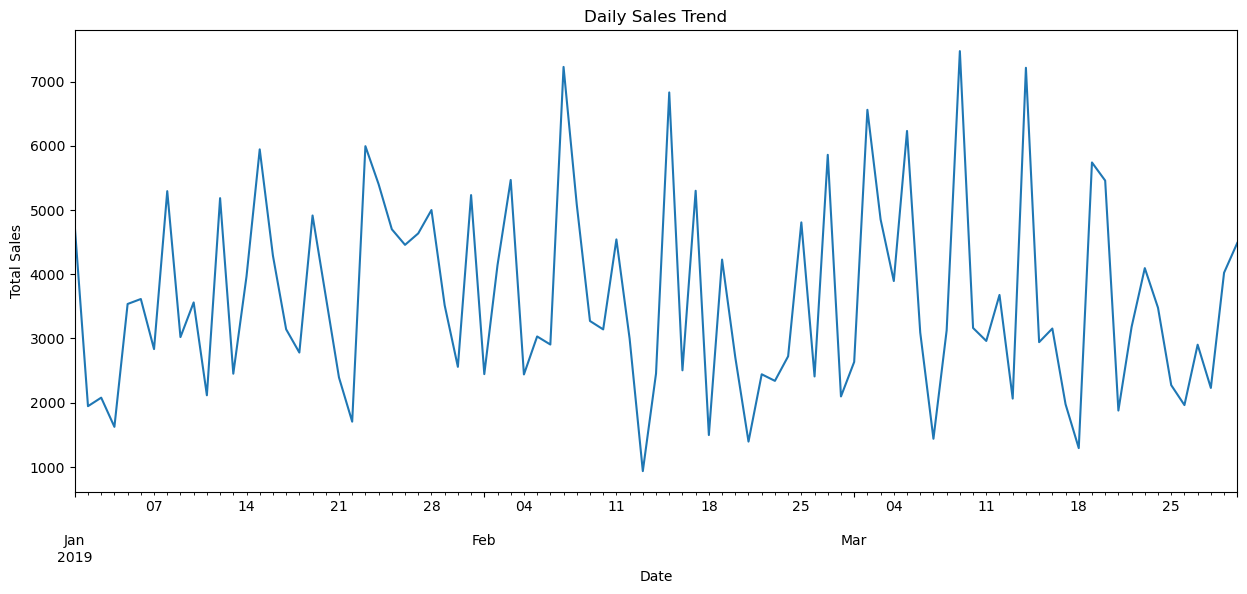

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
df = pd.read_csv('SuperMarket Analysis.csv')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# 1. Daily Sales Trend
daily_sales = df.resample('D')['Sales'].sum()

plt.figure(figsize=(15, 6))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


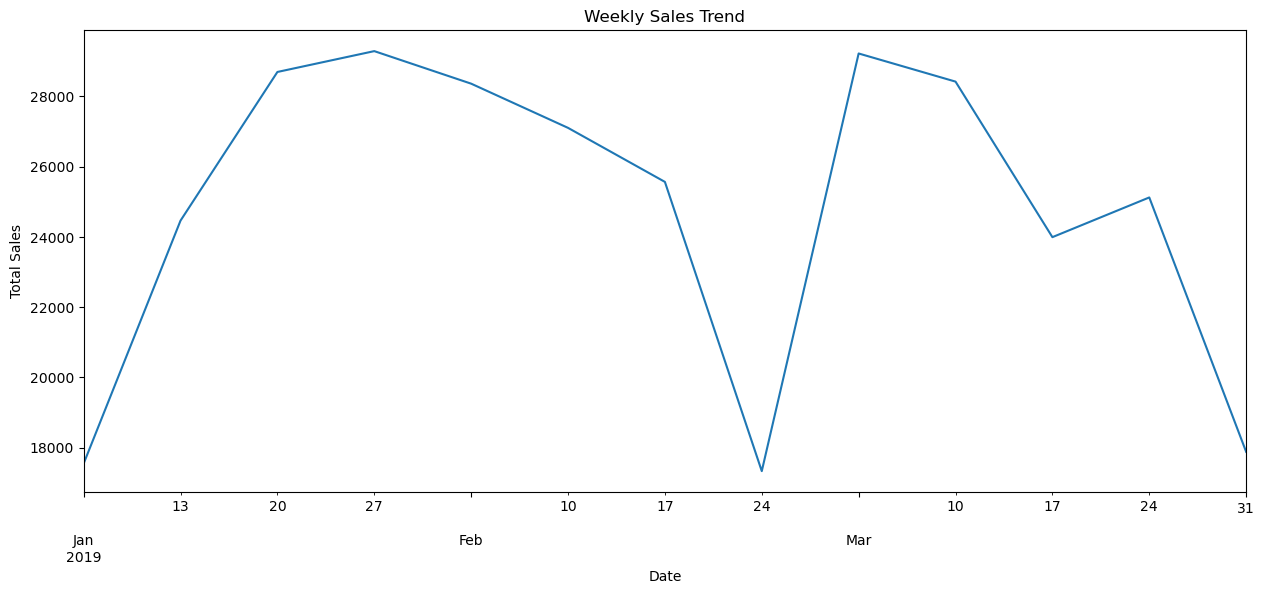

In [9]:
# 2. Weekly Sales Trend
weekly_sales = df.resample('W')['Sales'].sum()

plt.figure(figsize=(15, 6))
weekly_sales.plot()
plt.title('Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_9156\2895269652.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M')['Sales'].sum()


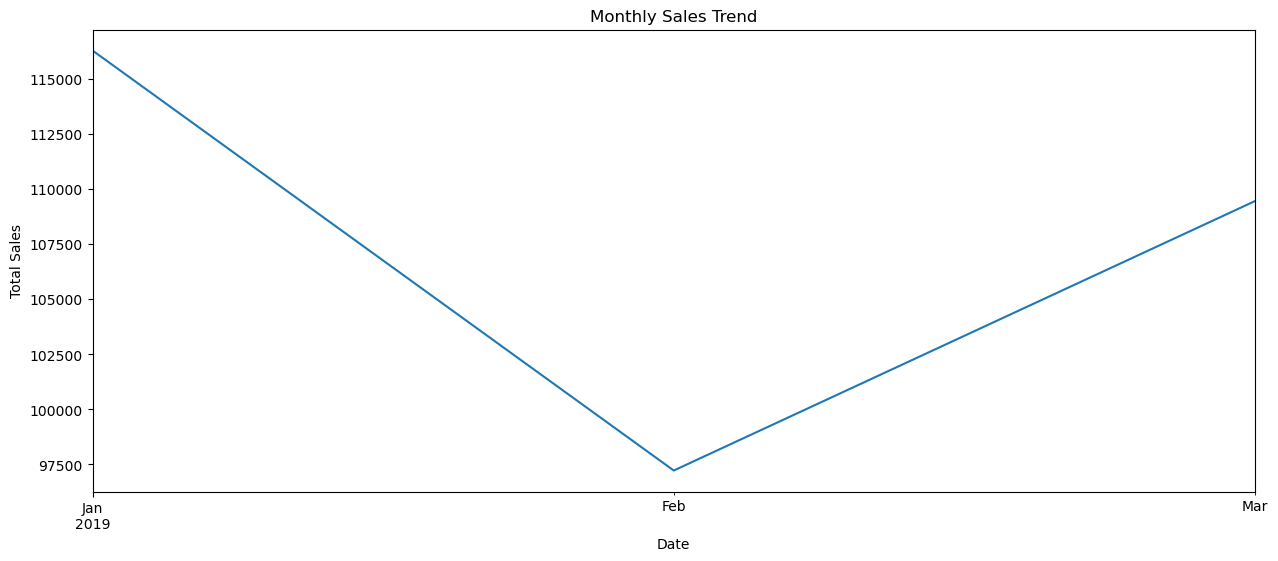

In [10]:
# 3. Monthly Sales Trend
monthly_sales = df.resample('M')['Sales'].sum()

plt.figure(figsize=(15, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

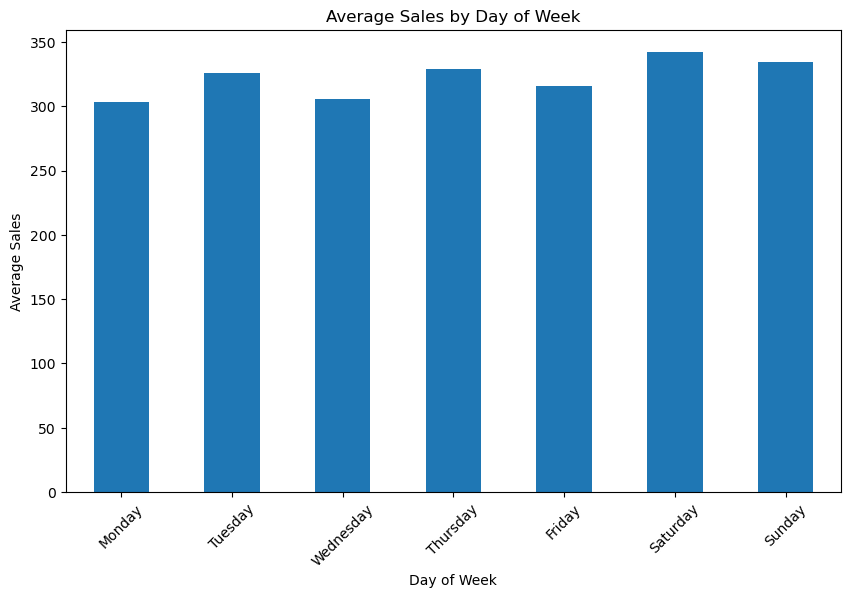

In [11]:
# 4. Sales by Day of Week
df['DayOfWeek'] = df.index.dayofweek
day_of_week_sales = df.groupby('DayOfWeek')['Sales'].mean().reindex(range(7))
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
day_of_week_sales.plot(kind='bar')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.xticks(range(7), day_names, rotation=45)
plt.show()


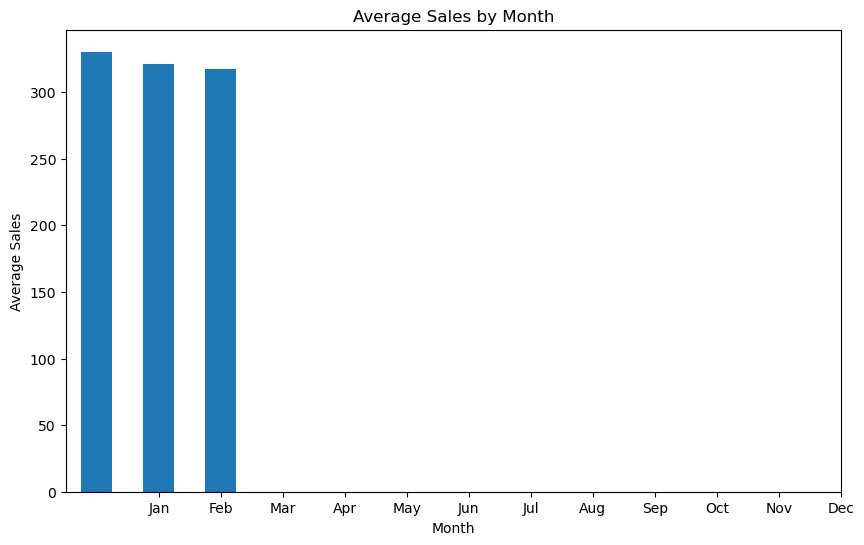

In [12]:
# 5. Sales by Month
df['Month'] = df.index.month
monthly_avg_sales = df.groupby('Month')['Sales'].mean()

plt.figure(figsize=(10, 6))
monthly_avg_sales.plot(kind='bar')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

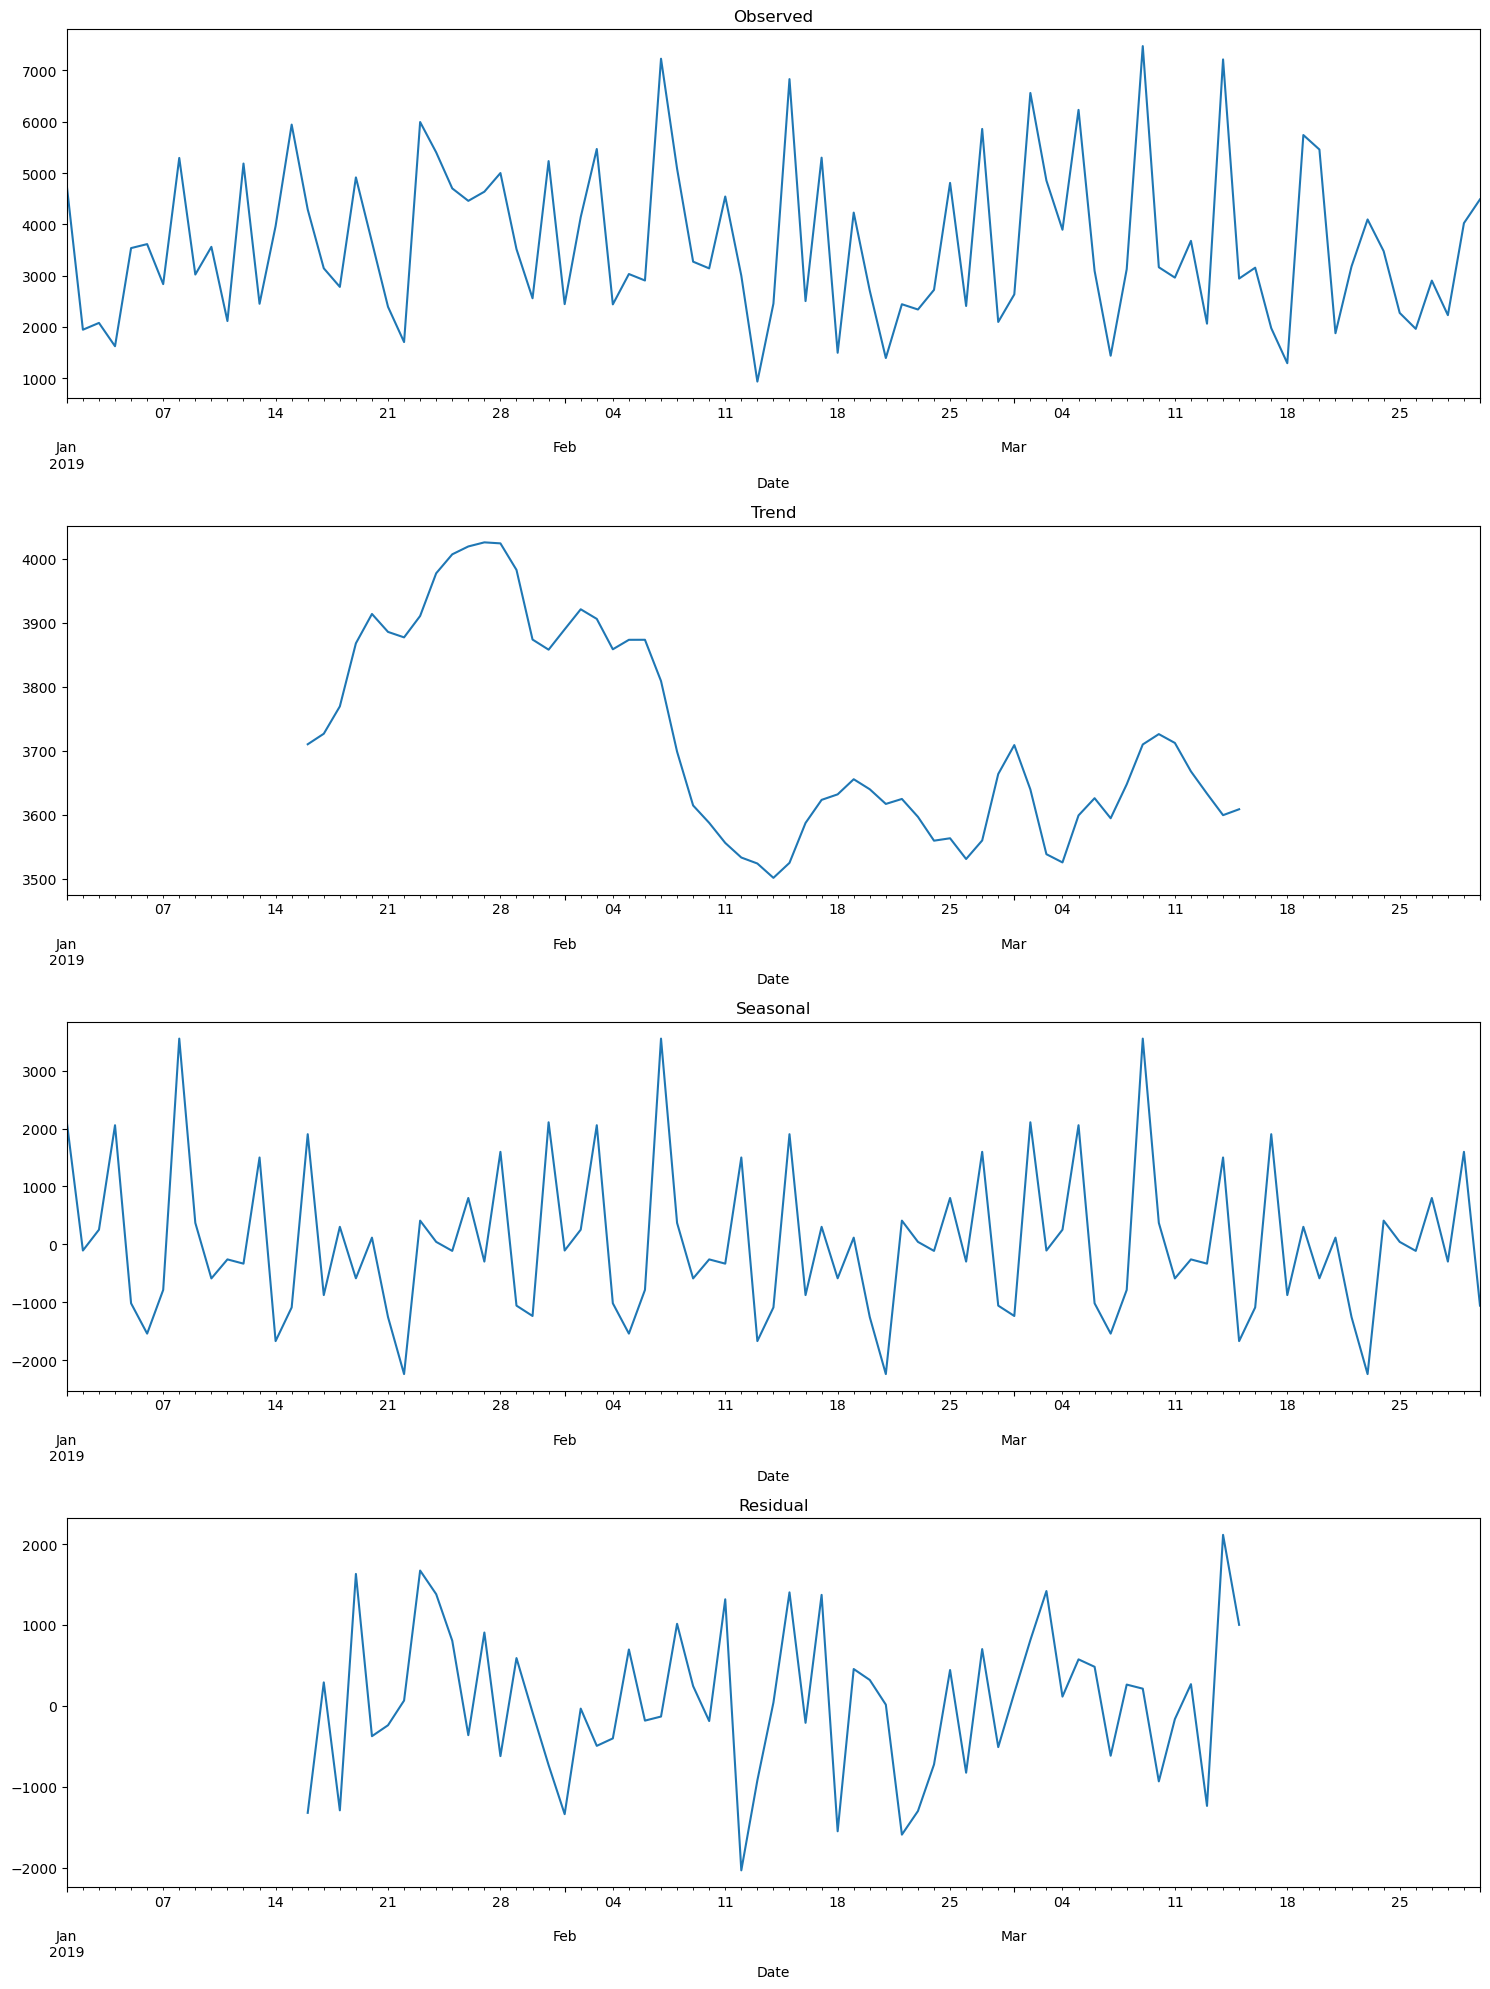

In [13]:
# 6. Seasonal Decomposition
# Note: This might not work well if you don't have enough data points
try:
    result = seasonal_decompose(daily_sales, model='additive', period=30)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 20))
    result.observed.plot(ax=ax1)
    ax1.set_title('Observed')
    result.trend.plot(ax=ax2)
    ax2.set_title('Trend')
    result.seasonal.plot(ax=ax3)
    ax3.set_title('Seasonal')
    result.resid.plot(ax=ax4)
    ax4.set_title('Residual')
    plt.tight_layout()
    plt.show()
except:
    print("Not enough data points for seasonal decomposition")


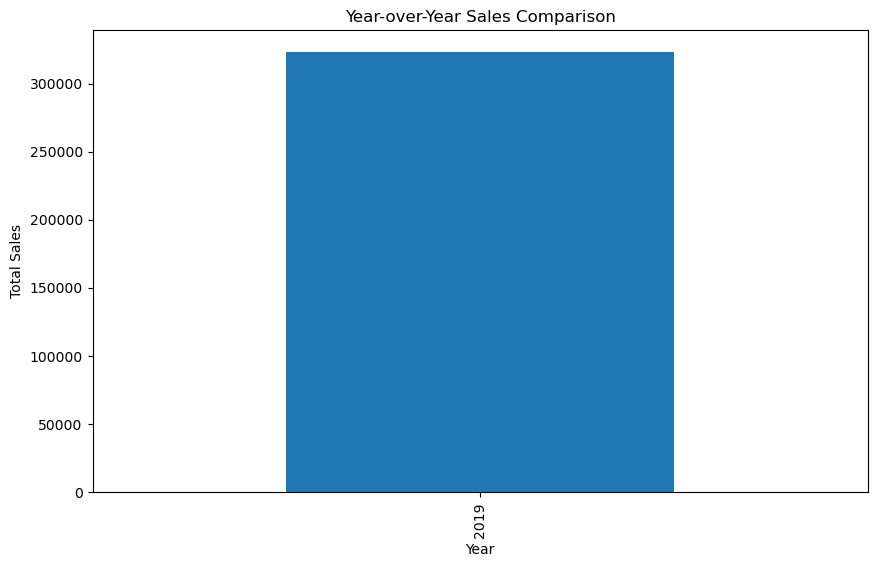

In [16]:

# 7. Year-over-Year Comparison
yearly_sales = df.groupby(df.index.year)['Sales'].sum()

plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar')
plt.title('Year-over-Year Sales Comparison')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

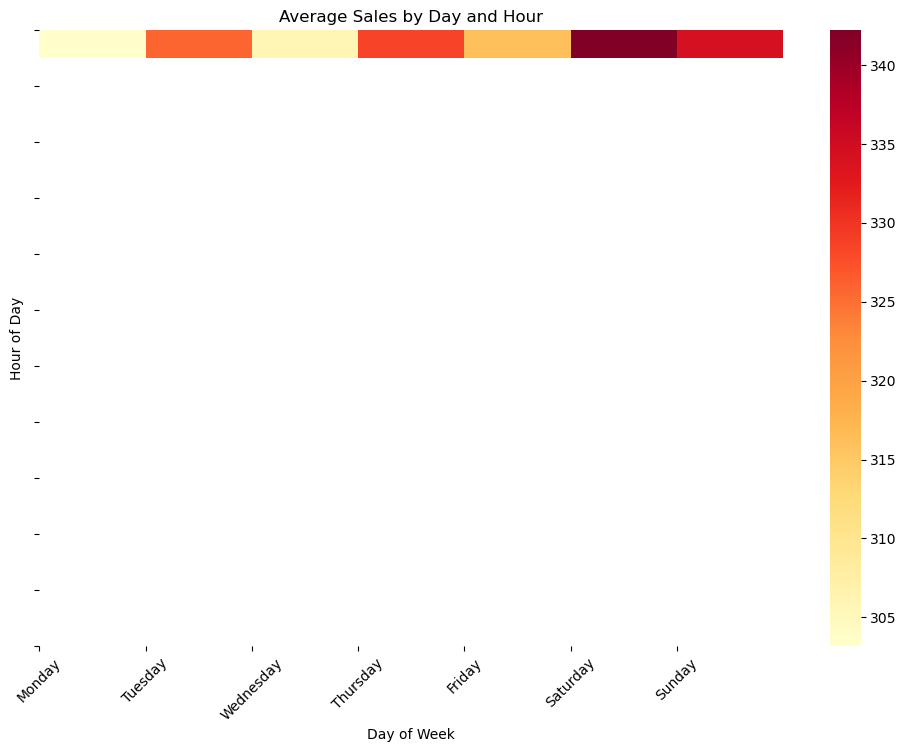

In [20]:
# 8. Heatmap of Sales by Day and Hour
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
sales_heatmap = df.pivot_table(values='Sales', index='Hour', columns='DayOfWeek', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap, cmap='YlOrRd')
plt.title('Average Sales by Day and Hour')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.yticks(range(0, 24, 2))
plt.xticks(range(7), day_names, rotation=45)
plt.show()


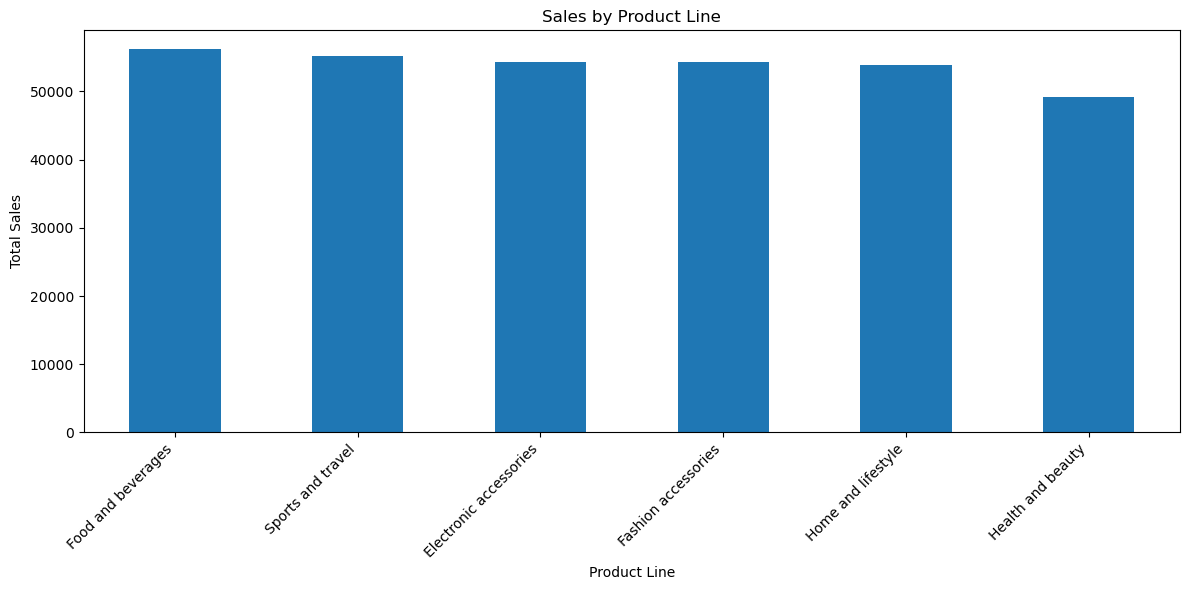

In [21]:
# 9. Top Selling Products
top_products = df.groupby('Product line')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

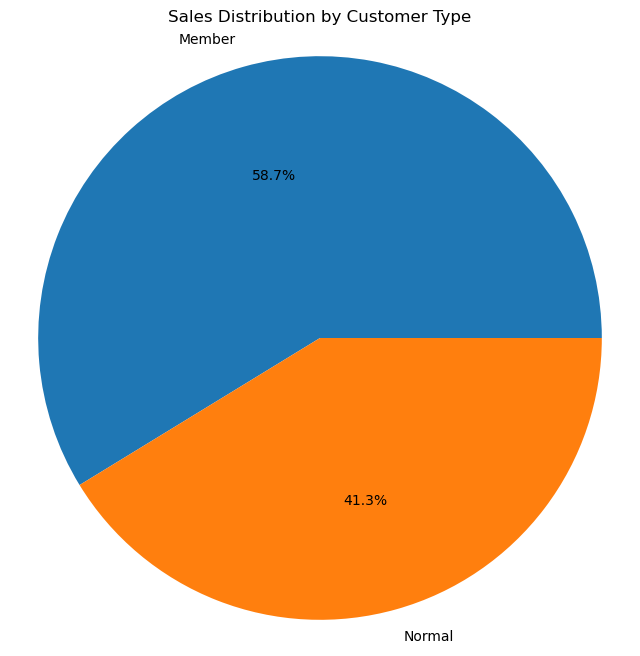

In [22]:
# 10. Sales Distribution by Customer Type
customer_type_sales = df.groupby('Customer type')['Sales'].sum()

plt.figure(figsize=(8, 8))
plt.pie(customer_type_sales, labels=customer_type_sales.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Customer Type')
plt.axis('equal')
plt.show()

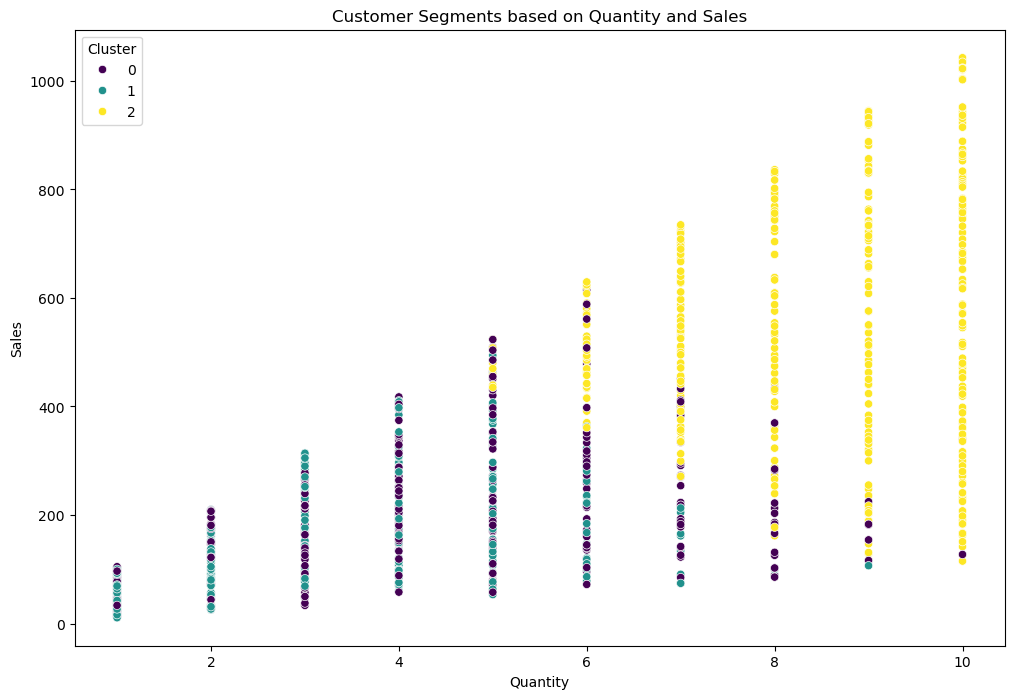

Numeric Features Average by Cluster:
         Quantity       Sales    Rating
Cluster                                
0        4.252396  200.304240  8.639936
1        3.233766  157.652352  5.647727
2        8.398417  558.613714  6.672559

Customer Type Distribution by Cluster:
Customer type    Member    Normal
Cluster                          
0              0.533546  0.466454
1              0.545455  0.454545
2              0.606860  0.393140


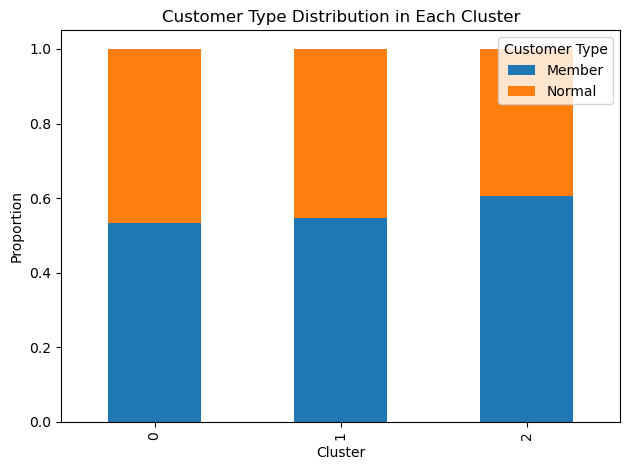

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the data
features = ['Quantity', 'Sales', 'Rating']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Quantity', y='Sales', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Quantity and Sales')
plt.show()

# Analyze cluster characteristics (numeric features)
print("Numeric Features Average by Cluster:")
print(df.groupby('Cluster')[features].mean())

# Analyze cluster characteristics (categorical features)
print("\nCustomer Type Distribution by Cluster:")
customer_type_dist = df.groupby('Cluster')['Customer type'].value_counts(normalize=True).unstack()
print(customer_type_dist)

# Additional visualization: Customer type distribution in each cluster
customer_type_dist.plot(kind='bar', stacked=True)
plt.title('Customer Type Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

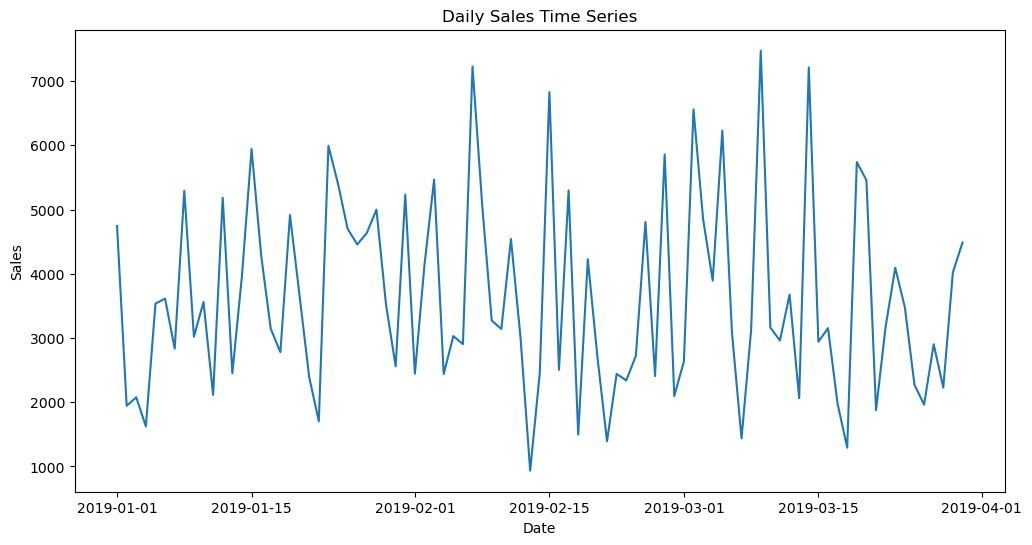

An error occurred while fitting the ARIMA model: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'
Consider using a different time series model or aggregating the data differently.


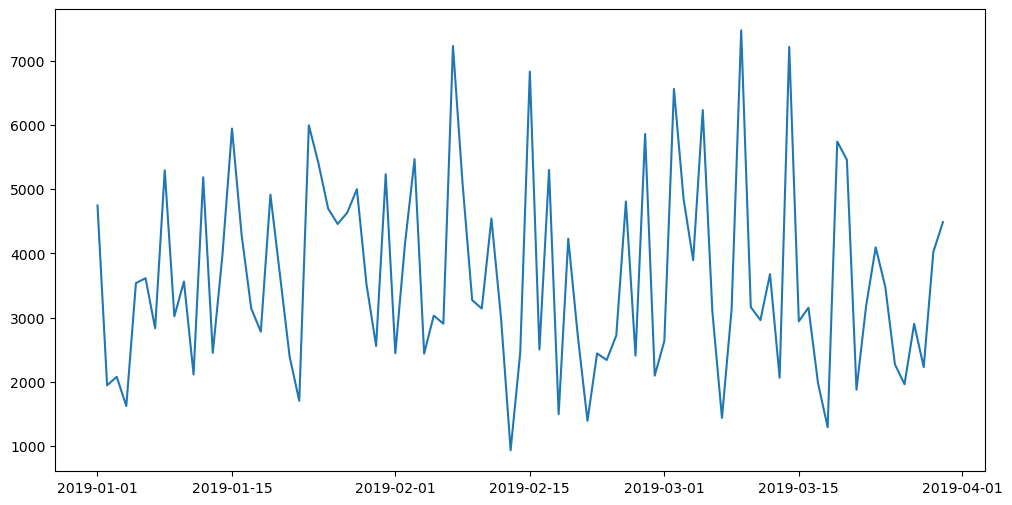

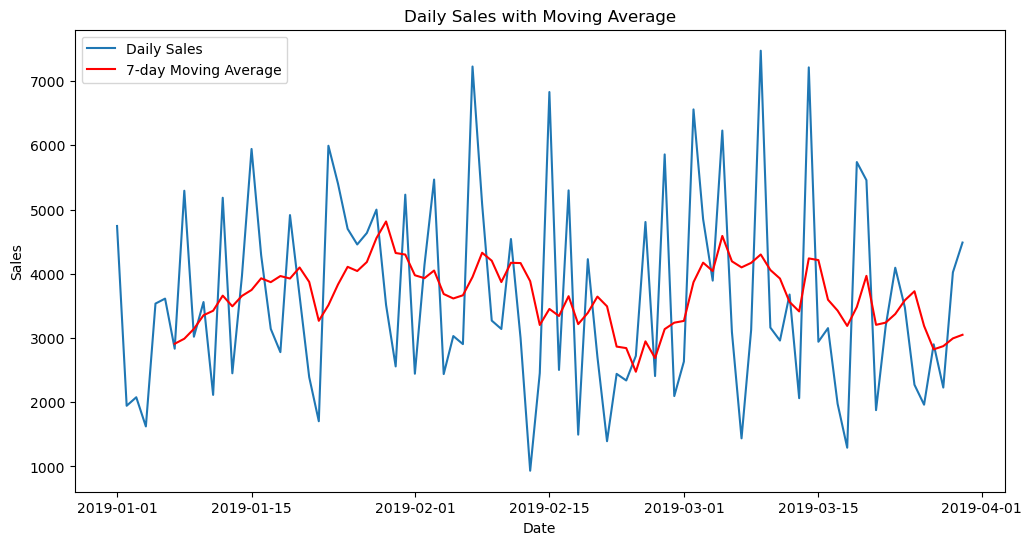

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Prepare time series data
daily_sales = df.resample('D')['Sales'].sum()

# Check for constant values
if daily_sales.std() == 0:
    print("Error: The sales data is constant. ARIMA modeling is not possible.")
else:
    # Check for sufficient data points
    if len(daily_sales) < 30:
        print("Warning: Limited data points. Results may not be reliable.")

    # Plot the original time series
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales)
    plt.title('Daily Sales Time Series')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

    # Simple differencing if the series is not stationary
    diff_sales = daily_sales.diff().dropna()

    # Fit ARIMA model
    try:
        model = ARIMA(daily_sales, order=(1,1,1))  # Using a simple (1,1,1) model
        results = model.fit()

        # Forecast future sales
        forecast_steps = 30
        forecast = results.forecast(steps=forecast_steps)

        # Plot the results
        plt.figure(figsize=(12, 6))
        plt.plot(daily_sales.index, daily_sales, label='Historical Data')
        plt.plot(pd.date_range(start=daily_sales.index[-1], periods=forecast_steps+1, closed='right'), 
                 forecast, color='red', label='Forecast')
        plt.title('ARIMA Forecast of Daily Sales')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.show()

        # Print model summary
        print(results.summary())

    except Exception as e:
        print(f"An error occurred while fitting the ARIMA model: {str(e)}")
        print("Consider using a different time series model or aggregating the data differently.")

# Additional analysis: Moving average
ma_window = 7  # 7-day moving average
daily_sales_ma = daily_sales.rolling(window=ma_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales, label='Daily Sales')
plt.plot(daily_sales_ma.index, daily_sales_ma, label=f'{ma_window}-day Moving Average', color='red')
plt.title('Daily Sales with Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [38]:
# Create lagged features and rolling averages (based on 'Sales' data)
df['Lag_1'] = df['Sales'].shift(1)
df['Lag_7'] = df['Sales'].shift(7)
df['Rolling_7'] = df['Sales'].rolling(window=7).mean()
df['Rolling_30'] = df['Sales'].rolling(window=30).mean()

# Drop any rows with NaN values caused by rolling/lagging
df = df.dropna()

Epoch 1/100


C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - loss: 2306.3093 - val_loss: 2040.8978
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1992.2479 - val_loss: 1921.1100
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1494.2516 - val_loss: 1475.5406
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1173.7252 - val_loss: 722.7394
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1175.1096 - val_loss: 572.5923
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 904.9564 - val_loss: 501.7031
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 868.9818 - val_loss: 482.4718
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 731.0226 - val_loss: 519.2546
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 657.2569 - val_loss: 551.6674
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 621.5959 - val_loss: 610.3810
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 699.0584 - val_loss: 579.5370
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━

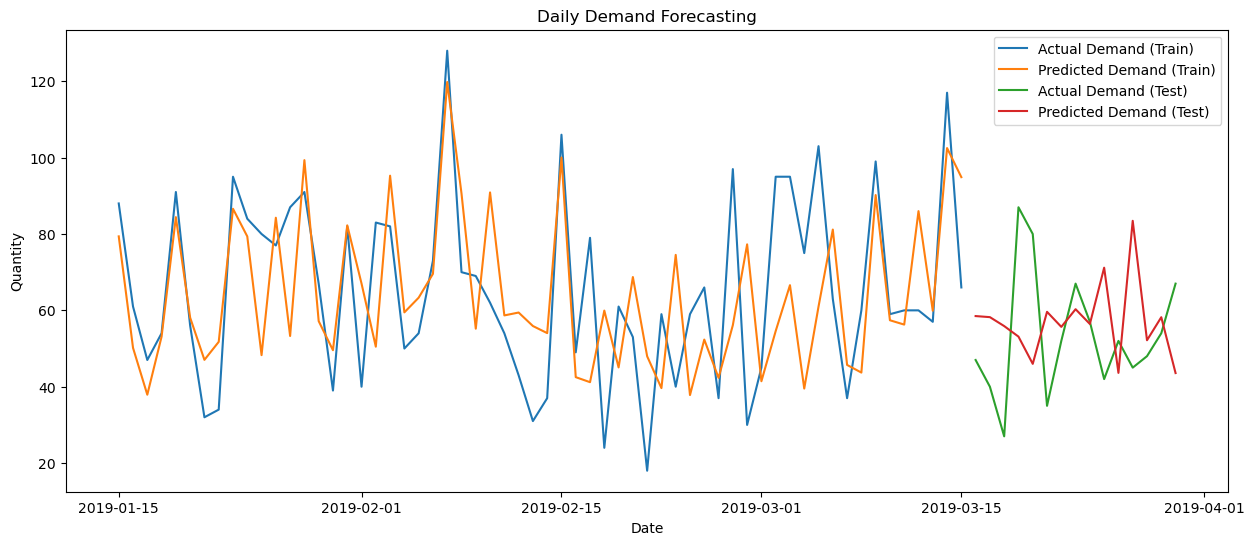

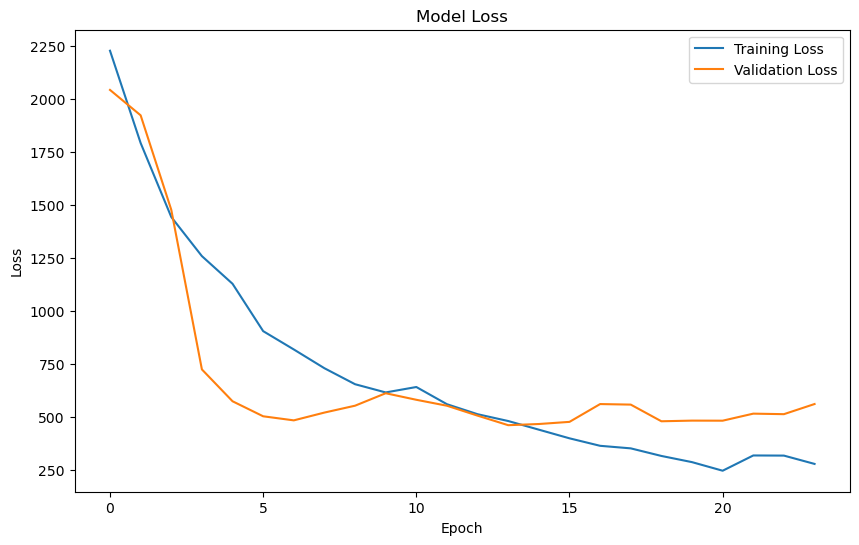

ValueError: cannot reshape array of size 784 into shape (1,14,4)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Load and preprocess the data
df = pd.read_csv('SuperMarket Analysis.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Group by date and sum the quantity
daily_demand = df.groupby('Date')['Quantity'].sum().reset_index()
daily_demand = daily_demand.set_index('Date')

# Feature engineering
daily_demand['DayOfWeek'] = daily_demand.index.dayofweek
daily_demand['Month'] = daily_demand.index.month
daily_demand['DayOfMonth'] = daily_demand.index.day

# Normalize the input features (not the target variable)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(daily_demand[['DayOfWeek', 'Month', 'DayOfMonth']])

# Create sequences for LSTM
def create_sequences(data, features, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(np.column_stack((features[i:(i + seq_length)], data[i:(i + seq_length)])))
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 14  # Use last 14 days to predict the next day
X, y = create_sequences(daily_demand['Quantity'].values, scaled_features, seq_length)

# Split the data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the simplified LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 4)),  # 4 features: 3 engineered + 1 target
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, 
                    callbacks=[early_stopping], verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Calculate RMSE and MAE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(daily_demand.index[seq_length:train_size+seq_length], y_train, label='Actual Demand (Train)')
plt.plot(daily_demand.index[seq_length:train_size+seq_length], train_predict, label='Predicted Demand (Train)')
plt.plot(daily_demand.index[train_size+seq_length:], y_test, label='Actual Demand (Test)')
plt.plot(daily_demand.index[train_size+seq_length:], test_predict, label='Predicted Demand (Test)')
plt.title('Daily Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Plot loss during training
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to make future predictions
def predict_future(model, last_sequence, scaler, num_days):
    future_predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(num_days):
        # Prepare the input for prediction
        input_seq = current_sequence[-seq_length:]
        input_seq_reshaped = np.reshape(input_seq, (1, seq_length, 4))
        
        # Make prediction
        next_day_pred = model.predict(input_seq_reshaped)
        future_predictions.append(next_day_pred[0, 0])
        
        # Update the sequence for next prediction
        new_features = scaler.transform([[(_ % 7), (daily_demand.index[-1] + pd.Timedelta(days=_+1)).month, (daily_demand.index[-1] + pd.Timedelta(days=_+1)).day]])
        new_row = np.concatenate((new_features[0], [next_day_pred[0, 0]]))
        current_sequence = np.vstack((current_sequence[1:], new_row))
    
    return future_predictions

# Predict the next 30 days
last_sequence = X[-seq_length:]
future_days = 30
future_predictions = predict_future(model, last_sequence, scaler, future_days)

# Create future dates
last_date = daily_demand.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# Plot the future predictions
plt.figure(figsize=(15, 6))
plt.plot(daily_demand.index, daily_demand['Quantity'], label='Historical Demand')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
plt.title('Demand Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Print the future predictions
future_demand = pd.DataFrame({'Date': future_dates, 'Predicted_Demand': future_predictions})
print(future_demand)